In [1]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt
import time
from scipy import signal
import pyfftw

#This are my libraries
import nlo 
import materials

In [2]:
NFFT = 2**10
Nup = 4
t = np.linspace(0,1,NFFT)
tup = np.linspace(0,1,Nup*NFFT)
x = 100*np.sin(10*t) + 100*np.sin(15*t) + 1j*np.random.rand(NFFT)

In [3]:
a = pyfftw.empty_aligned(NFFT, dtype='complex128')
A = pyfftw.empty_aligned(NFFT, dtype='complex128')
aup = pyfftw.empty_aligned(Nup*NFFT, dtype='complex128')
Aup = pyfftw.empty_aligned(Nup*NFFT, dtype='complex128')

fft_a = pyfftw.FFTW(a, A)
ifft_Aup = pyfftw.FFTW(Aup, aup, direction='FFTW_BACKWARD')

def resample(x, N):
    #Padding size
    M = N - x.size
    
    #FFT first
    a[:] = x
    A = fft_a()
    
    #Pad center
    center = int(A.size/2)
    X1 = A[:center]
    X2 = A[center:]
    Xc = np.zeros(M)
    Aup[:] = np.concatenate((X1, Xc, X2))
    
    #IFFT 
    aup = ifft_Aup()
    
    return aup * (N/x.size)

def upsample_fd(X, N):
    #Padding size
    M = N - X.size
    
    #Pad center
    center = int(X.size/2)
    X1 = X[:center]
    X2 = X[center:]
    Xc = np.zeros(M)
    Aup[:] = np.concatenate((X1, Xc, X2))
    
    #IFFT 
    aup = ifft_Aup()
    
    return aup * (N/x.size)

# Tests

In [5]:
xup1 = signal.resample(x, Nup*NFFT)
xup2 = resample(x, Nup*NFFT)
xup3 = upsample_fd(fft(x), Nup*NFFT)

In [6]:
print(x)
print()
print(xup1)
print()
print(xup2)
print()
print(xup3)

[ 0.        +0.81936514j  2.44372466+0.00765178j  4.88704069+0.42008578j
 ... 14.4769229 +0.01791735j 12.55634741+0.58624669j
 10.62667293+0.18333092j]

[-1.59872116e-14+0.81936514j -7.91775730e-01+0.78730112j
 -3.63441871e-01+0.583983j   ...  8.00785640e+00+0.26553347j
  4.91577332e+00+0.46283185j  2.02957868e+00+0.68491655j]

[-2.66453526e-15+0.81936514j -7.84739152e-01+0.79105814j
 -3.53490649e-01+0.58929624j ...  8.00081982e+00+0.26177644j
  4.90582209e+00+0.45751861j  2.02254210e+00+0.68115952j]

[-2.57571742e-14+0.81936514j -7.84739152e-01+0.79105814j
 -3.53490649e-01+0.58929624j ...  8.00081982e+00+0.26177644j
  4.90582209e+00+0.45751861j  2.02254210e+00+0.68115952j]


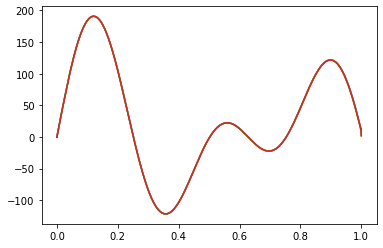

In [7]:
plt.plot(t, np.real(x))
plt.plot(tup, np.real(xup1))
plt.plot(tup, np.real(xup2))
plt.plot(tup, np.real(xup3))

# Performance

In [8]:
%timeit signal.resample(x, Nup*NFFT)

94 µs ± 939 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit resample(x, Nup*NFFT)

43.2 µs ± 37.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%timeit upsample_fd(fft(x), Nup*NFFT)

56.6 µs ± 76.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
X = fft(x)
%timeit upsample_fd(X, Nup*NFFT)

39.8 µs ± 82.6 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
